<a href="https://colab.research.google.com/github/DarianSawali/Computer-Vision-Project-Overview/blob/main/computer_vision_yolo_augmented3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')


In [ ]:
!pip3 install -q ultralytics opencv-python
import ultralytics
ultralytics.checks()


Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M4)
Setup complete ✅ (10 CPUs, 16.0 GB RAM, 116.2/460.4 GB disk)


In [ ]:
from pathlib import Path
import yaml

data_yaml = Path.home() / "Downloads" / "TACO dataset.v1i.yolov8" / "data.yaml"
print("YAML exists:", data_yaml.exists(), "\nPath:", data_yaml)

with open(data_yaml, "r") as f:
    y = yaml.safe_load(f)

print("nc:", y.get("nc"))
print("names:", y.get("names"))

YAML exists: True 
Path: /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml
nc: 6
names: ['cardboard', 'glass', 'metal', 'other', 'paper', 'plastic']


In [ ]:
from ultralytics import YOLO
import torch

device = "mps" if torch.backends.mps.is_available() else "cpu"
print("Using device:", device)

Using device: mps


In [ ]:
from pathlib import Path

for split in ["train", "valid", "test"]:
    p = Path("/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8")/split/"labels.cache"
    if p.exists():
        p.unlink()
        print("Deleted:", p)


Deleted: /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/train/labels.cache
Deleted: /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/labels.cache


In [ ]:
from pathlib import Path
import shutil, random

ROOT = Path("/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/train")
names = ["cardboard","glass","metal","other","paper","plastic"]
minor = {"other": 8, "glass": 3}

for cls, mult in minor.items():
    img_list = [p for p in (ROOT/"images").glob("*.jpg")] + [p for p in (ROOT/"images").glob("*.png")]

    keep = []
    for img in img_list:
        lab = (ROOT/"labels"/(img.stem + ".txt"))
        if not lab.exists():
            continue
        with open(lab) as f:
            lines = [ln.strip() for ln in f if ln.strip()]
        if not lines:
            continue
        if any(int(ln.split()[0]) == names.index(cls) for ln in lines):
            keep.append((img, lab))

    out_img = ROOT/"images_aug"; out_lbl = ROOT/"labels_aug"
    out_img.mkdir(exist_ok=True); out_lbl.mkdir(exist_ok=True)

    for _ in range(mult-1):
        random.shuffle(keep)
        for i,(img,lab) in enumerate(keep):
            shutil.copy(img, out_img/f"{img.stem}_dup{_}_{i}{img.suffix}")
            shutil.copy(lab, out_lbl/f"{lab.stem}_dup{_}_{i}.txt")

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data="/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml",
    epochs=16,
    patience=12,
    imgsz=768,
    batch=8,
    device="mps",

    optimizer="AdamW",
    lr0=0.002,
    lrf=0.01,
    cos_lr=True,

    cls=1.0,
    box=7.5,
    dfl=1.5,

    mosaic=1.0,
    close_mosaic=10,
    copy_paste=0.5,
    copy_paste_mode="flip",
    mixup=0.15,
    erasing=0.5,
    hsv_h=0.02,
    hsv_s=0.7,
    hsv_v=0.4,
    fliplr=0.5,
    flipud=0.05,
    degrees=5.0,
    shear=2.0,
    translate=0.08,
    scale=0.5,
    auto_augment="randaugment",

    workers=0,
    nms=True,
    max_det=100,
    project="runs/detect",
    name="train_augment3"
)

New https://pypi.org/project/ultralytics/8.3.223 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=1.0, compile=False, conf=None, copy_paste=0.5, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml, degrees=5.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=16, erasing=0.5, exist_ok=False, fliplr=0.5, flipud=0.05, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.01, mask_ratio=4, max_det=100, mixup=0.15, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_augment32, n

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x31bddf350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/Users/darianaxelsawali/runs/detect/train_augment32/weights/best.pt")


results = model.val(
    data="/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml",
    split="val",
    imgsz=480,
    device="mps",
    plots=True
)

print("Curves regenerated. Check:", results.save_dir)

Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 MPS (Apple M4)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1384.7±651.7 MB/s, size: 1148.5 KB)
val: Scanning /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/labels.cache... 199 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 199/199 721.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 0.1it/s 1:33
                   all        199        357      0.463      0.243      0.124     0.0749
             cardboard         15         18     0.0888      0.222       0.08     0.0482
                 glass         14         26          1          0     0.0185    0.00829
                 metal         39         79      0.226       0.43      0.217      0.135
                 other         11         12          1          0     0.0191     0.0118
                 paper 

In [ ]:
from pathlib import Path

RUN_DIR = Path("runs/detect/train_augment32")
WEIGHTS = RUN_DIR / "weights" / "best.pt"

DATA_YAML = Path("/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/data.yaml")

print("Run dir exists:", RUN_DIR.exists())
print("Best weights exist:", WEIGHTS.exists())
print("Data YAML exists:", DATA_YAML.exists())

Run dir exists: True
Best weights exist: True
Data YAML exists: True


In [ ]:
from pathlib import Path
import shutil

run_dir = Path("runs/detect/train_augment32")
export_dir = Path("/Users/darianaxelsawali/Desktop/YOLO_Augmented3_Export")
export_dir.mkdir(parents=True, exist_ok=True)

for fname in ["confusion_matrix.png", "BoxPR_curve.png", "BoxF1_curve.png", "results.png"]:
    src = run_dir / fname
    if src.exists():
        shutil.copy(src, export_dir / fname)
        print("Exported:", export_dir / fname)
    else:
        print("Missing:", src)

Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented3_Export/confusion_matrix.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented3_Export/BoxPR_curve.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented3_Export/BoxF1_curve.png
Exported: /Users/darianaxelsawali/Desktop/YOLO_Augmented3_Export/results.png


Export dir: /Users/darianaxelsawali/Desktop/YOLO_Augmented3_Export exists: True


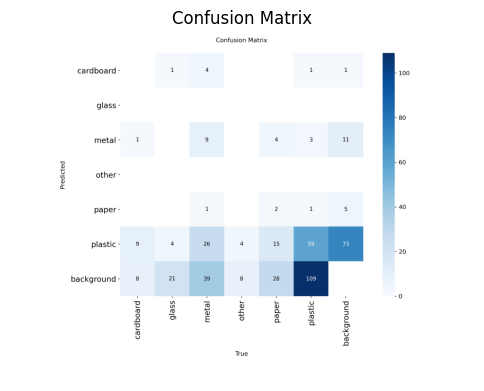

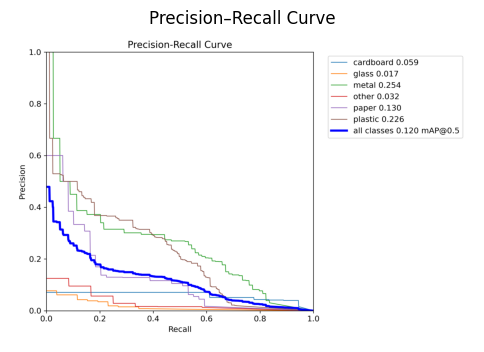

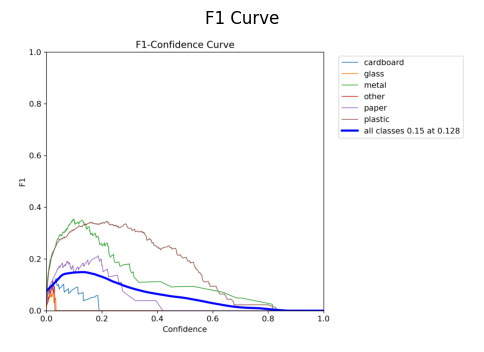

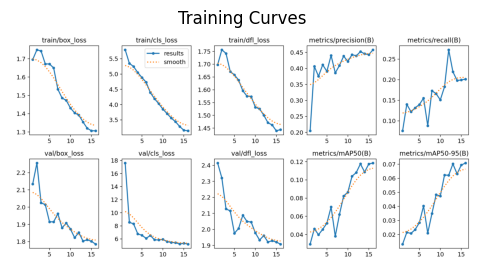

In [ ]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

export_dir = Path.cwd() / "Desktop" / "YOLO_Augmented3_Export"
print("Export dir:", export_dir, "exists:", export_dir.exists())

for name, title in [
    ("confusion_matrix.png", "Confusion Matrix"),
    ("BoxPR_curve.png", "Precision–Recall Curve"),
    ("BoxF1_curve.png", "F1 Curve"),
    ("results.png", "Training Curves"),
]:
    p = export_dir / name
    if p.exists():
        plt.figure(figsize=(6,6))
        plt.imshow(Image.open(p).convert("RGB")); plt.axis("off"); plt.title(title)
        plt.show()
    else:
        print("Not found:", p)

Ultralytics 8.3.218 🚀 Python-3.13.7 torch-2.9.0 CPU (Apple M4)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1735.4±349.0 MB/s, size: 1761.0 KB)
val: Scanning /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/labels.cache... 199 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 199/199 718.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 0.2it/s 56.2s
                   all        199        357      0.458      0.202       0.12     0.0715
Speed: 0.7ms preprocess, 255.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /Users/darianaxelsawali/runs/detect/val18
CM sum (should be > 0): 144.0


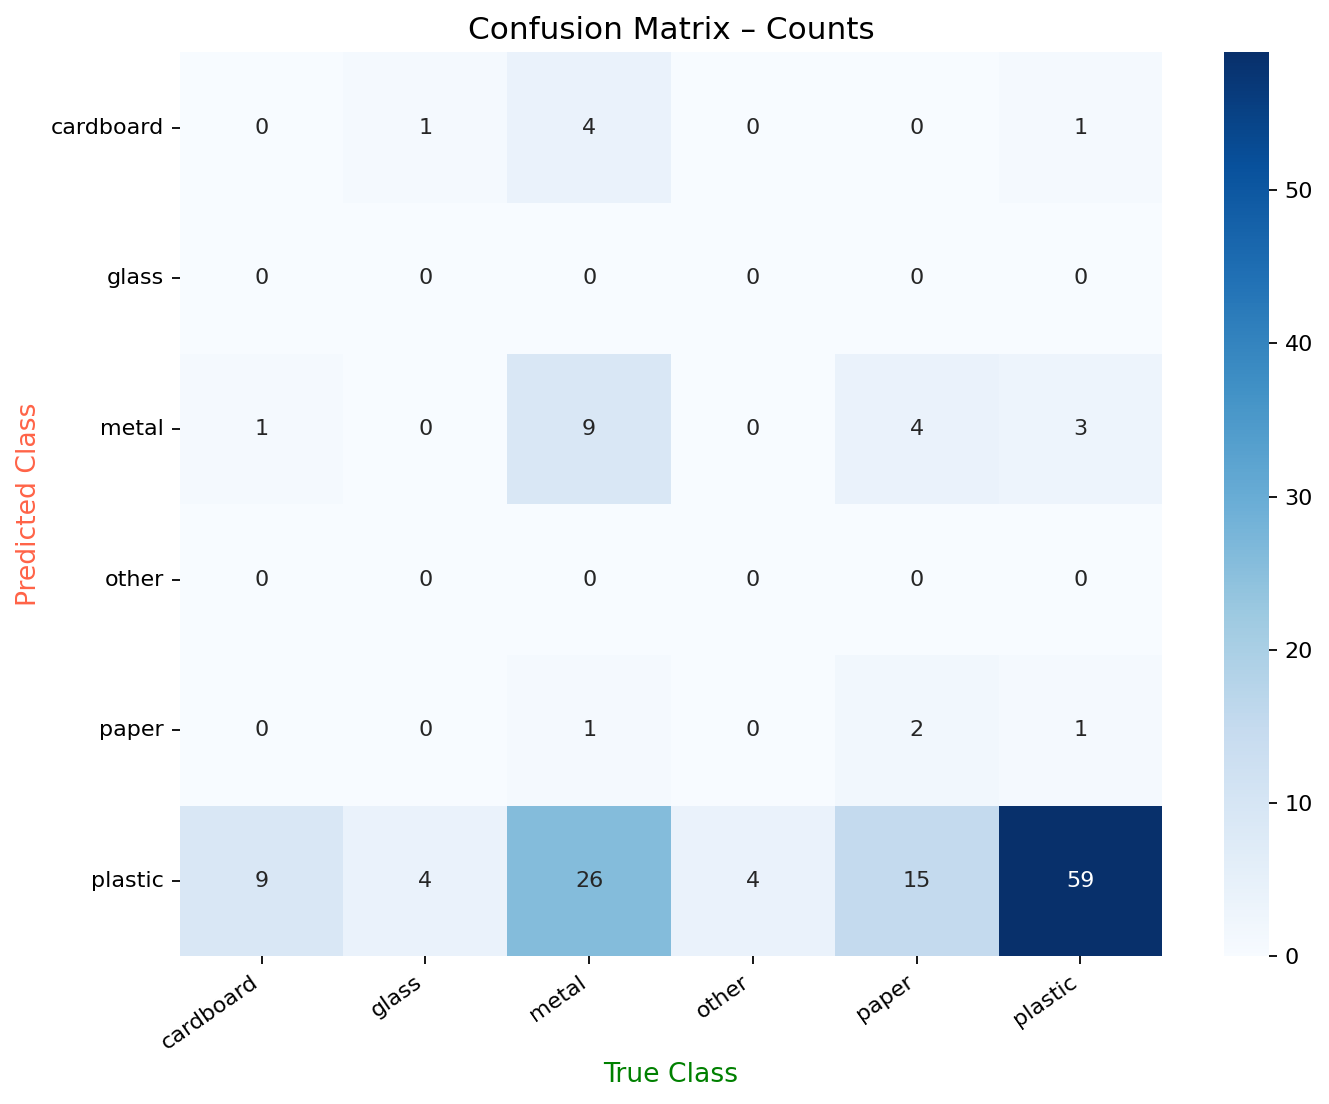

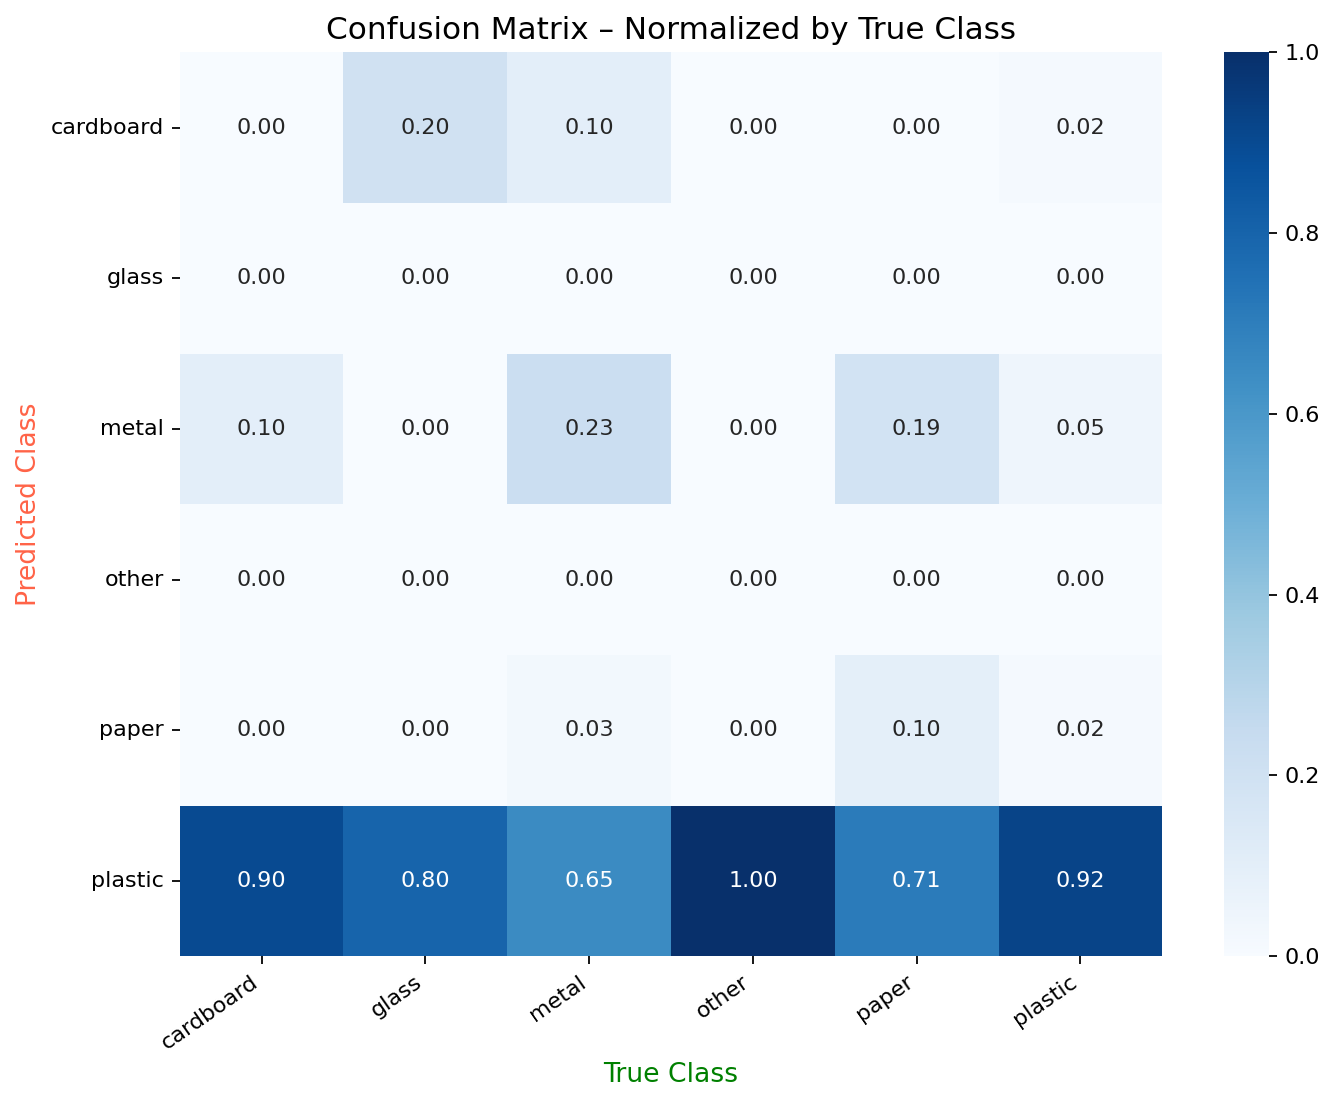

In [ ]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

run_dir = "/Users/darianaxelsawali/runs/detect/train_augment32"
best = f"{run_dir}/weights/best.pt"
CONF = 0.001
IOU  = 0.7

model = YOLO(best)
res = model.val(split="val", conf=CONF, iou=IOU, plots=True, verbose=False)

cm_full = res.confusion_matrix.matrix
if isinstance(cm_full, torch.Tensor):
    cm_full = cm_full.cpu().numpy()

nc = len(res.names)
labels = [res.names[i] for i in range(nc)]
cm = cm_full[:nc, :nc]

print("CM sum (should be > 0):", cm.sum())

plt.figure(figsize=(9,7), dpi=160)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("True Class", fontsize=12, color="green")
plt.ylabel("Predicted Class", fontsize=12, color="tomato")
plt.title("Confusion Matrix – Counts", fontsize=14)
plt.xticks(rotation=35, ha='right'); plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

row_sums = cm.sum(axis=0, keepdims=True)
cm_norm = np.divide(cm, row_sums, out=np.zeros_like(cm, dtype=float), where=row_sums!=0)

plt.figure(figsize=(9,7), dpi=160)
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("True Class", fontsize=12, color="green")
plt.ylabel("Predicted Class", fontsize=12, color="tomato")
plt.title("Confusion Matrix – Normalized by True Class", fontsize=14)
plt.xticks(rotation=35, ha='right'); plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from ultralytics import YOLO
from pathlib import Path

weights = "runs/detect/train_augment32/weights/best.pt"
model = YOLO(weights)

img_src = "/Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images"
for c in [0.15, 0.25, 0.35]:
    name = f"val3_preds_conf{int(c*100)}"
    preds = model.predict(
        source=img_src,
        imgsz=480,
        conf=c,
        iou=0.6,
        max_det=100,
        device="mps",
        save=True,
        project="runs/preds",
        name="val_augment3"
    )
    print("Saved:", preds[0].save_dir)


image 1/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_JPG.rf.3ea0602baa7b341ebd5cba44d32ec453.jpg: 480x384 1 plastic, 9357.8ms
image 2/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_jpg.rf.239416263fc44e304fad0f1f21bbeb47.jpg: 384x480 1 plastic, 12234.8ms
image 3/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_jpg.rf.785c52fe2311d0fd19da7a7894d5b5d6.jpg: 384x480 1 metal, 915.9ms
image 4/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000000_jpg.rf.d7a448b5668666901c05fbe1325dfc5a.jpg: 224x480 1 plastic, 5677.9ms
image 5/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000001_JPG.rf.01b5c9a848b153df9f2df2f9c6ce21ad.jpg: 480x384 1 metal, 3 plastics, 1101.1ms
image 6/199 /Users/darianaxelsawali/Downloads/TACO dataset.v1i.yolov8/valid/images/000002_jpg.rf.846b02ab844804f8a299e5eb56b75829.jpg: 384x480 1 plastic, 956.4ms
image 7/199 /U

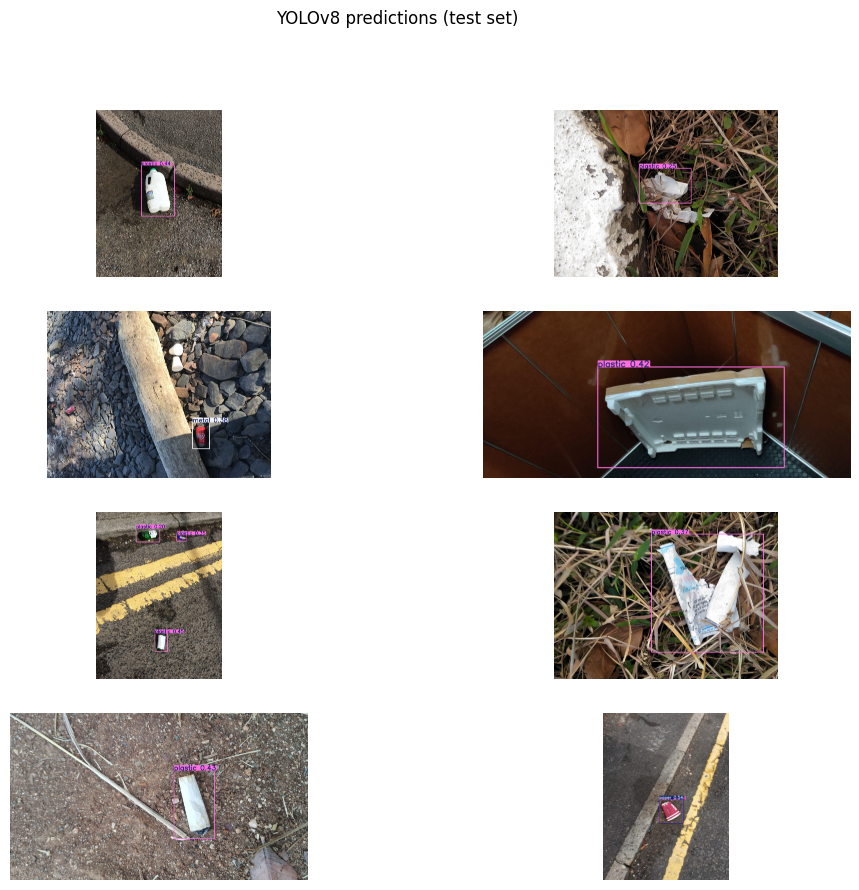

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

viz = Path("runs/preds/val_augment32")
imgs = sorted(viz.glob("*.*"))[:8]
plt.figure(figsize=(12, 10))
for i,p in enumerate(imgs,1):
    plt.subplot(4,2,i); plt.imshow(Image.open(p)); plt.axis("off")
plt.suptitle("YOLOv8 predictions (test set)")
plt.show()

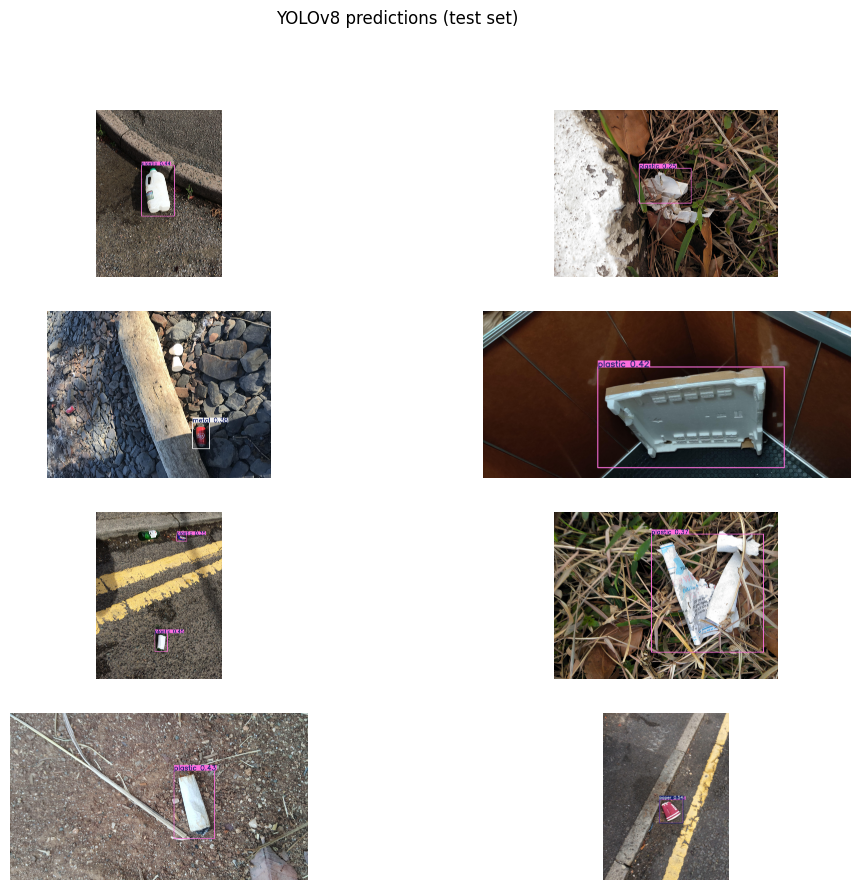

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

viz = Path("runs/preds/val_augment33")
imgs = sorted(viz.glob("*.*"))[:8]
plt.figure(figsize=(12, 10))
for i,p in enumerate(imgs,1):
    plt.subplot(4,2,i); plt.imshow(Image.open(p)); plt.axis("off")
plt.suptitle("YOLOv8 predictions (test set)")
plt.show()

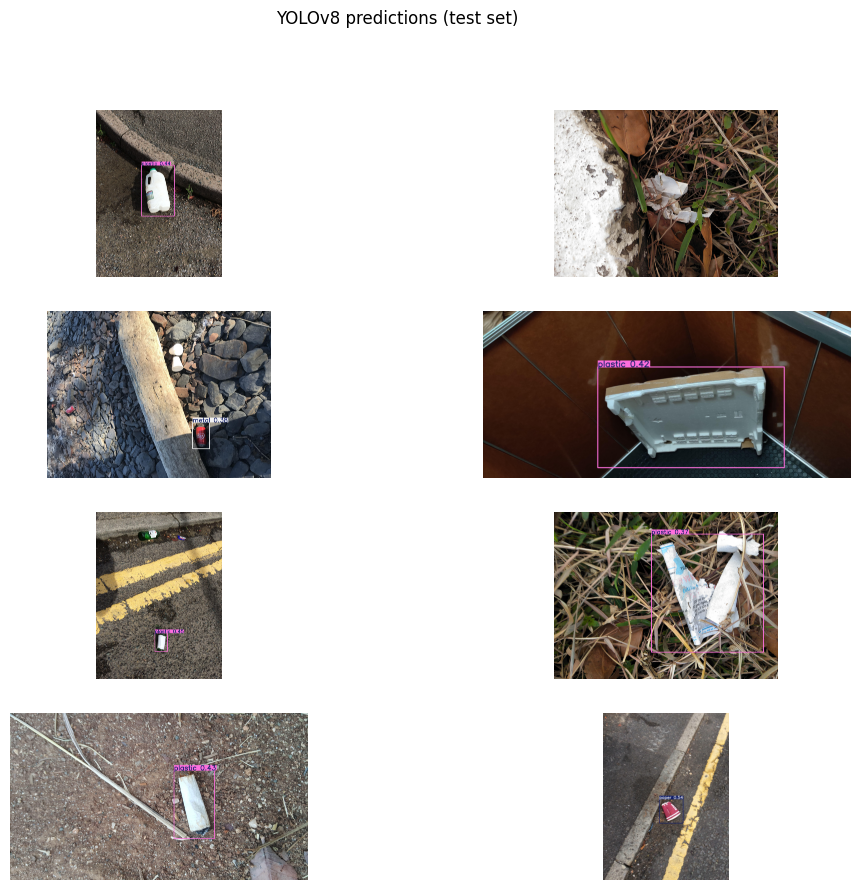

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

viz = Path("runs/preds/val_augment34")
imgs = sorted(viz.glob("*.*"))[:8]
plt.figure(figsize=(12, 10))
for i,p in enumerate(imgs,1):
    plt.subplot(4,2,i); plt.imshow(Image.open(p)); plt.axis("off")
plt.suptitle("YOLOv8 predictions (test set)")
plt.show()

In [ ]:
import shutil
from pathlib import Path

src = Path("/Users/darianaxelsawali/runs")
dst = Path("/Users/darianaxelsawali/Desktop/YOLO_Runs_Backup_Augmented3")
shutil.copytree(src, dst, dirs_exist_ok=True)
print("Copied to:", dst)

Copied to: /Users/darianaxelsawali/Desktop/YOLO_Runs_Backup_Augmented3
